# TASK 1 :- Prediction using Supervised ML

In this task, we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

Data Science & Business Analytics Internship Task_2

Author: Pankaj Kande

# Step 1: Importing Libraries needed to perform task

                     Importing all libraries required in this Project

In [180]:


import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings                   
warnings.filterwarnings('ignore')

# Step 2: DATA PREPROCESSING / CLEANING

                     Reading dataset

In [181]:
# Reading data from remote link
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [182]:
data.shape

(25, 2)

In [183]:
pd.set_option("display.max_columns", None)
pd.set_option("display.max_columns", None)

In [184]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


               Checking Null Values

In [185]:
data.isnull().sum().sort_values(ascending = False)

Hours     0
Scores    0
dtype: int64

                Checking Data Type

In [186]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

# Step 3: Data Visualization

                EDA  [Exploratory Data Analysis]

                Scatter plot & Correlation btw variables


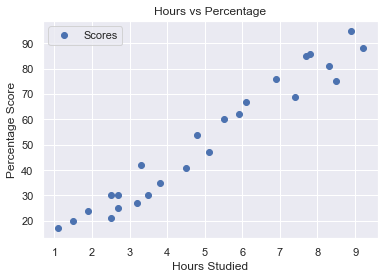

In [187]:
data.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

*Plotting the distribution of scores

                  Histogram of all data's feature Distribution

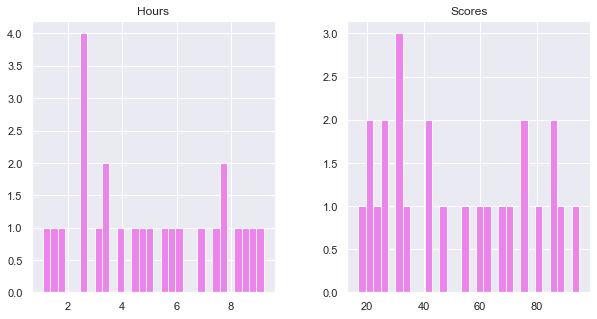

In [188]:
data.hist(bins=30 , figsize=(10,5), color = ['violet'] )
plt.show()

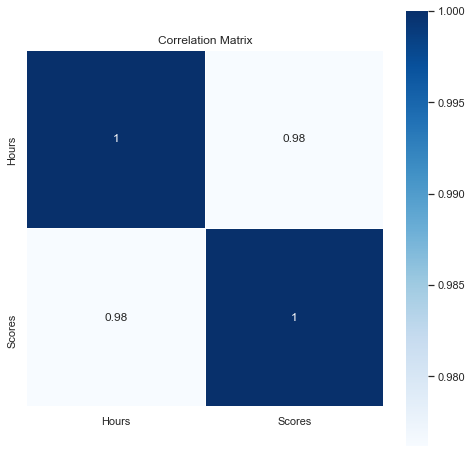

In [189]:
plt.figure(figsize = (8, 8))
sns.set(font_scale = 1)
sns.heatmap(data.corr(), cmap = "Blues", annot = True, square = True, linewidths = .5)
plt.title("Correlation Matrix");

* Here the heatmap shows positive correlation between the Hours column and Scores column.

<AxesSubplot:xlabel='Hours'>

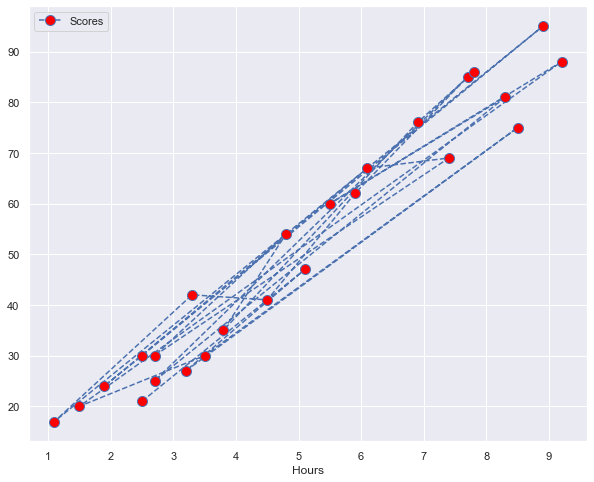

In [190]:
data.plot("Hours","Scores",linestyle = "--",marker = "o",markersize = "10",markerfacecolor = "red", figsize=(10,8))


- From the graphs above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.


# Step 4:  Sampling [Train Test spliting]

In [191]:
from sklearn.model_selection import train_test_split
data_train , data_test = train_test_split(data, test_size= .2)

In [192]:
data_train_y = data_train.iloc[: , -1]
data_train_x = data_train.iloc[: , 0:-1]

In [193]:
data_test_y = data_test.iloc[: , -1]
data_test_x = data_test.iloc[: , 0:-1]

In [194]:

print(data_train_x.shape)
print(data_train_y.shape)
print("---------------")
print(data_test_x.shape)
print(data_test_y.shape)

(20, 1)
(20,)
---------------
(5, 1)
(5,)


# Step 5 : Training the Model.


In [195]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [196]:
linreg.fit(data_train_x , data_train_y)

LinearRegression()

                 Rsquare

In [197]:
Rsquare = linreg.score(data_train_x , data_train_y)
Rsquare

0.9529353676735209

In [198]:
N = data_train_x.shape[0]
K = data_train_x.shape[1]

                AdjRquare

In [199]:
AdjRquare = 1 - (1-Rsquare) * (N - 1) / (N-K-1)
AdjRquare

0.9503206658776054

In [200]:
linreg.coef_

array([9.74299734])

In [201]:
pred_train = linreg.predict(data_train_x) 
pred_test  = linreg.predict(data_test_x)

In [202]:
err_train = data_train_y - pred_train
err_test  = data_test_y  - pred_test

                                 Scatter plot on error

Text(0.5, 1.0, 'scatter plot on error')

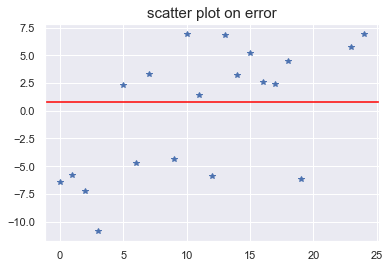

In [203]:
plt.plot(err_train , "*")
plt.axhline(y=0.8,color="red")
#plt.axhline(y=-0.1,color="red")
plt.title("scatter plot on error",size=15)

(array([1., 0., 0., 0., 0., 0., 1., 2., 2., 0., 2., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 1., 0., 3., 2., 0., 1., 0., 2., 0., 3.]),
 array([-10.87876097, -10.2847577 ,  -9.69075443,  -9.09675116,
         -8.50274788,  -7.90874461,  -7.31474134,  -6.72073807,
         -6.1267348 ,  -5.53273153,  -4.93872826,  -4.34472499,
         -3.75072171,  -3.15671844,  -2.56271517,  -1.9687119 ,
         -1.37470863,  -0.78070536,  -0.18670209,   0.40730118,
          1.00130445,   1.59530773,   2.189311  ,   2.78331427,
          3.37731754,   3.97132081,   4.56532408,   5.15932735,
          5.75333062,   6.3473339 ,   6.94133717]),
 <BarContainer object of 30 artists>)

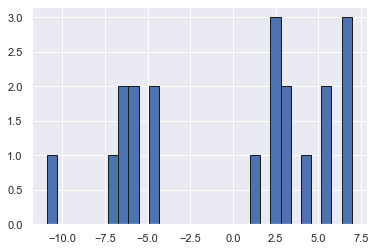

In [204]:
plt.hist(err_train , bins = 30 , edgecolor = 'k')

                             Plotting the regression line

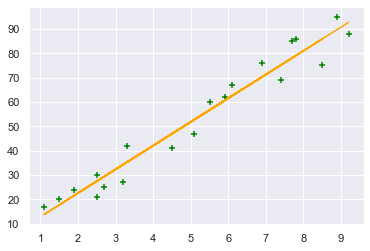

In [205]:

line = linreg.coef_*data_train_x+linreg.intercept_

# Plotting for the test data
plt.scatter(data_train_x, data_train_y,color='green',marker='+')
plt.plot(data_train_x, line, color='Orange')
plt.show()

In [206]:
pred_act = pd.DataFrame({"Actual" : data_test_y, "Predict" : np.round(pred_test) })
pred_act

,Actual,Predict
21,54,50.0
22,35,40.0
8,81,84.0
4,30,37.0
20,30,29.0


<AxesSubplot:xlabel='Actual', ylabel='Predict'>

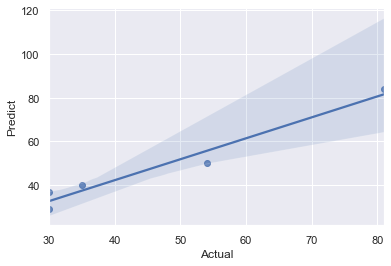

In [207]:
sns.regplot( x = "Actual" , y = "Predict" , data = pred_act)

# Step 6 : Evaluating the model


               * Mean Absolute Error

In [208]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(data_test_y , pred_test)) 

Mean Absolute Error: 3.9963124068694604


               * MAPE [ mean absolute percentage error ]

In [209]:
MAPE = np.mean(np.abs(err_test * 100 / data_test_y))
np.round(MAPE)

10.0

                * Accuracy

In [210]:
ACC = (100 - MAPE )
ACC

89.62900116065677

                * Testing your own data.


In [211]:
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = linreg.predict(test)
print ("No. of Hours = {}".format(hours))
print ("Predicted Score = {}".format(own_pred[0]))

No. of Hours = 9.25
Predicted Score = 93.1860089706347


# CONCLUSION:
From the above result we can say that if a studied for 9.25 then student will secured 93.18 MARKS